   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000 

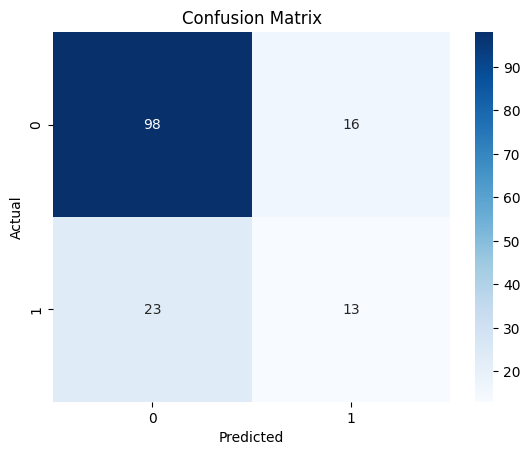

     Feature  Importance
3       Time    0.440400
0    Recency    0.266563
1  Frequency    0.150673
2   Monetary    0.142363
   Recency  Frequency  Monetary  Time  Class  \
0        2         50     12500    99      1   
1        0         13      3250    28      1   
2        1         17      4000    36      1   
3        2         20      5000    45      1   
4        1         24      6000    77      0   

                                      Recommendation  
0  Increase exercise, monitor diet, schedule lab ...  
1  Increase exercise, monitor diet, schedule lab ...  
2  Increase exercise, monitor diet, schedule lab ...  
3  Increase exercise, monitor diet, schedule lab ...  
4      Maintain current lifestyle, regular checkups.  


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("blood.csv")  # Replace with your dataset path

# Inspect Data
print(df.head())
print(df.info())
print(df.describe())

# Handle Missing Values (if any)
df.fillna(df.mean(), inplace=True)

# Features and Target
X = df[['Recency', 'Frequency', 'Monetary', 'Time']]
y = df['Class']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importance = pd.DataFrame({'Feature': ['Recency', 'Frequency', 'Monetary', 'Time'],
                           'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

# Simple Recommendation System
def recommend(row):
    if row['Class'] == 0:
        return "Maintain current lifestyle, regular checkups."
    elif row['Class'] == 1:
        return "Increase exercise, monitor diet, schedule lab tests."
    else:
        return "Consult doctor, consider medication adjustment."

df['Recommendation'] = df.apply(recommend, axis=1)
print(df[['Recency','Frequency','Monetary','Time','Class','Recommendation']].head())


   Recency  Frequency  Monetary  Time  Class  Hemoglobin          WBC  \
0        2         50     12500    99      1   14.745071  6082.723296   
1        0         13      3250    28      1   13.792604  4890.008355   
2        1         17      4000    36      1   14.971533  5615.150131   
3        2         20      5000    45      1   16.284545  4972.473092   
4        1         24      6000    77      0   13.648770  5536.190121   

       Platelets     Glucose  Cholesterol  
0  353075.178832  124.258189   182.161106  
1  310418.311530  101.565339   173.633731  
2  301203.126291   86.518239   151.442446  
3  279626.347460   80.045296   182.324416  
4  288918.053808   97.163194   187.732576  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      748 non-null    int64  
 1   Frequency    748 non-null    int64  
 2   Monetary     748 no

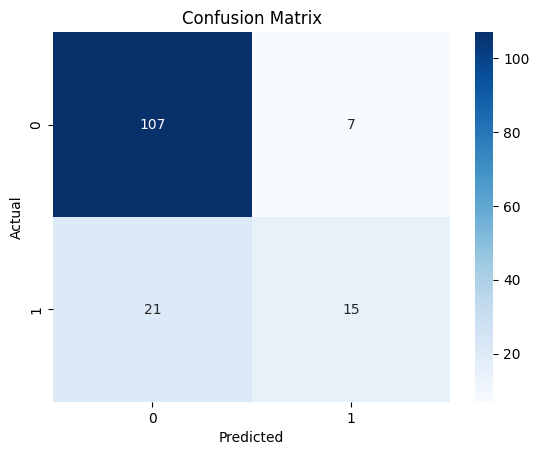

       Feature  Importance
8  Cholesterol    0.132235
7      Glucose    0.129582
6    Platelets    0.126404
4   Hemoglobin    0.123636
5          WBC    0.118441
0      Recency    0.113898
3         Time    0.113183
1    Frequency    0.080221
2     Monetary    0.062400
   Recency  Frequency  Monetary  Time  Hemoglobin          WBC      Platelets  \
0        2         50     12500    99   14.745071  6082.723296  353075.178832   
1        0         13      3250    28   13.792604  4890.008355  310418.311530   
2        1         17      4000    36   14.971533  5615.150131  301203.126291   
3        2         20      5000    45   16.284545  4972.473092  279626.347460   
4        1         24      6000    77   13.648770  5536.190121  288918.053808   

      Glucose  Cholesterol  Class  \
0  124.258189   182.161106      1   
1  101.565339   173.633731      1   
2   86.518239   151.442446      1   
3   80.045296   182.324416      1   
4   97.163194   187.732576      0   

                    

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("blood.csv")  # Replace with your dataset path

# Example: Adding synthetic blood parameters if not present
# In a real scenario, these would come from your actual dataset
if 'Hemoglobin' not in df.columns:
    np.random.seed(42)
    df['Hemoglobin'] = np.random.normal(14, 1.5, size=len(df))  # g/dL
if 'WBC' not in df.columns:
    df['WBC'] = np.random.normal(7000, 1500, size=len(df))  # cells/µL
if 'Platelets' not in df.columns:
    df['Platelets'] = np.random.normal(250000, 50000, size=len(df))  # cells/µL
if 'Glucose' not in df.columns:
    df['Glucose'] = np.random.normal(100, 15, size=len(df))  # mg/dL
if 'Cholesterol' not in df.columns:
    df['Cholesterol'] = np.random.normal(180, 30, size=len(df))  # mg/dL

# Inspect Data
print(df.head())
print(df.info())
print(df.describe())

# Handle Missing Values
df.fillna(df.mean(), inplace=True)

# Features and Target
features = ['Recency', 'Frequency', 'Monetary', 'Time', 'Hemoglobin', 'WBC', 'Platelets', 'Glucose', 'Cholesterol']
X = df[features]
y = df['Class']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importance = pd.DataFrame({'Feature': features,
                           'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

# Personalized Healthcare Recommendations
def recommend(row):
    recs = []
    # Blood-based recommendations
    if row['Hemoglobin'] < 12:
        recs.append("Increase iron intake; consult for anemia.")
    if row['WBC'] > 11000:
        recs.append("Possible infection; consult doctor.")
    if row['Platelets'] < 150000:
        recs.append("Check for bleeding disorders.")
    if row['Glucose'] > 126:
        recs.append("Monitor blood sugar; consider diabetes management.")
    if row['Cholesterol'] > 200:
        recs.append("Reduce cholesterol intake; monitor heart health.")

    # Class-based recommendations
    if row['Class'] == 0:
        recs.append("Maintain current lifestyle, regular checkups.")
    elif row['Class'] == 1:
        recs.append("Increase exercise, monitor diet, schedule lab tests.")
    else:
        recs.append("Consult doctor, consider medication adjustment.")

    return " | ".join(recs)

df['Recommendation'] = df.apply(recommend, axis=1)
print(df[['Recency','Frequency','Monetary','Time','Hemoglobin','WBC','Platelets','Glucose','Cholesterol','Class','Recommendation']].head())
